<a href="https://colab.research.google.com/github/renu0071989/CALL-CENTER-ANALYSIS-PWC-/blob/main/ANN_CHURN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


data=pd.read_excel("/content/02 Churn-Dataset.xlsx")

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


In [5]:
data.describe(include="O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
unique_values_churn = data['Churn'].unique()
print(unique_values_churn)


['No' 'Yes']


In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0).astype(int)

In [8]:
columns_to_dummyencode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','PaperlessBilling','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

# Applying one-hot encoding to the specified columns
data_encoded = pd.get_dummies(data, columns=columns_to_dummyencode,drop_first=True)



In [9]:
data_encoded['Churn'] = data_encoded['Churn'].map({'Yes': 1, 'No': 0})

data_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,gender_Male,Partner_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,2,53.85,108,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840,0,3,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,2,70.70,151,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:


data_encoded.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   int64  
 5   numAdminTickets                        7043 non-null   int64  
 6   numTechTickets                         7043 non-null   int64  
 7   Churn                                  7043 non-null   int64  
 8   gender_Male                            7043 non-null   uint8  
 9   Partner_Yes                            7043 non-null   uint8  
 10  Dependents_Yes                         7043 non-null   uint8  
 11  Phon

In [12]:
data_encoded.drop('customerID',axis=1,inplace=True)

In [13]:
data_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,gender_Male,Partner_Yes,Dependents_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,34,56.95,1889,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,2,53.85,108,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1840,0,3,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,2,70.70,151,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data_encoded' is your DataFrame
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the specified columns
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])


In [15]:
data_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,gender_Male,Partner_Yes,Dependents_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.115423,0.003339,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.472222,0.385075,0.217526,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0.027778,0.354229,0.012437,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.625000,0.239303,0.211884,0,3,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0.027778,0.521891,0.017388,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split



# Independent variables (features)
X = data_encoded.drop('Churn', axis=1)  # Dropping 'Churn' to get independent features

# Dependent variable (target)
y = data_encoded['Churn']  # Target variable

# Splitting the data into a 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5634, 32)
X_test shape: (1409, 32)
y_train shape: (5634,)
y_test shape: (1409,)


In [17]:
!pip install tensorflow scikit-learn


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score



# Initialize the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # Adding a Dropout layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))  # Adding another Dropout layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with Early Stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Epoch 1/100
177/177 [==============================] - 1s 2ms/step - loss: 0.4494 - accuracy: 0.7787 - val_loss: 0.3429 - val_accuracy: 0.8297
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8319 - val_loss: 0.3176 - val_accuracy: 0.8396
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8435 - val_loss: 0.3047 - val_accuracy: 0.8488
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8445 - val_loss: 0.3040 - val_accuracy: 0.8545
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8513 - val_loss: 0.3018 - val_accuracy: 0.8545
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8521 - val_loss: 0.2936 - val_accuracy: 0.8573
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8619 - val_loss: 0.2922 - val_accuracy: 0.8566

Epoch 1/100
177/177 [==============================] - 1s 4ms/step - loss: 0.2928 - accuracy: 0.8651 - val_loss: 0.2790 - val_accuracy: 0.8630
Epoch 2/100
177/177 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.8671 - val_loss: 0.2801 - val_accuracy: 0.8659
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.2889 - accuracy: 0.8676 - val_loss: 0.2783 - val_accuracy: 0.8666
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.2892 - accuracy: 0.8692 - val_loss: 0.2778 - val_accuracy: 0.8652
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.2871 - accuracy: 0.8674 - val_loss: 0.2818 - val_accuracy: 0.8680
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 0.2908 - accuracy: 0.8717 - val_loss: 0.2790 - val_accuracy: 0.8623
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.2861 - accuracy: 0.8697 - val_loss: 0.2809 - val_accuracy: 0.8644

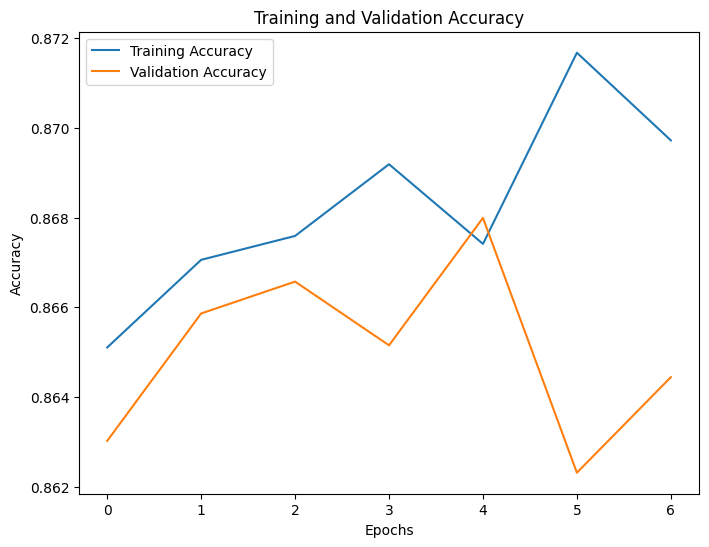

In [20]:
import matplotlib.pyplot as plt

# Train the model with Early Stopping and record the history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Extract accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
